# Data Mining

## Tugas 3: Regresi Linear

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas3_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat beberapa *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**NIM: 0102514015**

**Nilai akhir: XX/60**

### Import

In [2]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline

plt.style.use('bmh')
#warnings.filterwarnings('ignore')

RANDOM_STATE = 1337

In [3]:
df = pd.read_csv('../dataset/diabetes.csv')

### Deskripsi Dataset

Diabetes dataset
================

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:
- Number of Instances: 442
- Number of Attributes: First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline
- Attributes:
    - :Age:
    - :Sex:
    - :Body mass index:
    - :Average blood pressure:
    - :S1:
    - :S2:
    - :S3:
    - :S4:
    - :S5:
    - :S6:

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

## 1. Eksplorasi Awal Data (20 poin)

Sebelum menerapkan model regresi, Anda diminta untuk mengeksplorasi atribut dan label yang akan digunakan dalam tugas ini.

### Soal 1.1 (6 poin)

Gambarkan histogram untuk `age`, `bmi`, dan `bp`. Gambarkan juga kurva distribusi Gaussian yang dicocokkan dengan tiap atribut tersebut.

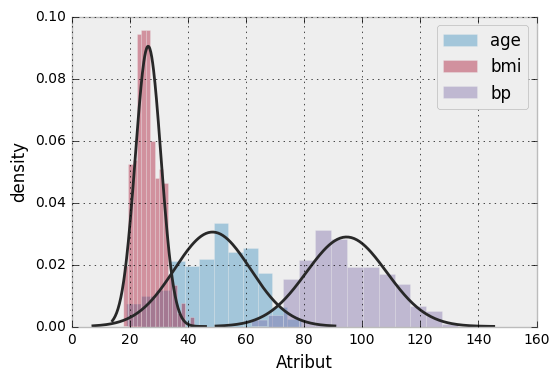

In [4]:
sns.distplot(df.age, fit=norm, kde=False, label='age')
sns.distplot(df.bmi, fit=norm, kde=False, label='bmi')
sns.distplot(df.bp, fit=norm, kde=False, label='bp')
plt.xlabel('Atribut')
plt.ylabel('density')
plt.legend()
plt.show()

### Soal 1.2 (2 poin)

Gambarkan bar plot untuk `sex`.

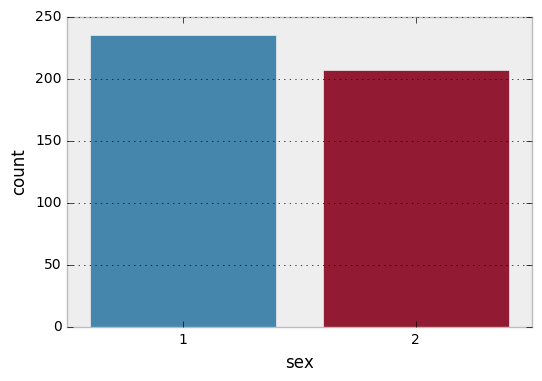

In [5]:
sns.countplot(df.sex)
plt.show()

### Soal 1.3.a (2 poin)

Karena kita mungkin akan kesulitan memahami atribut `s1`-`s6`, coba gambarkan dalam bentuk joint plot.

C:\Users\nurul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


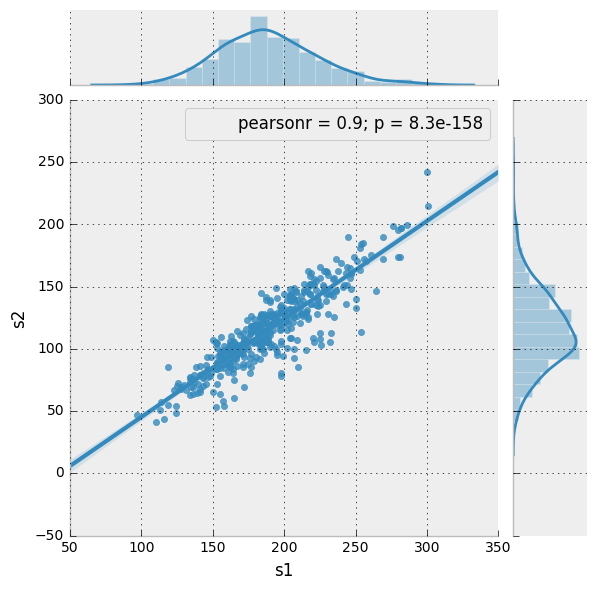

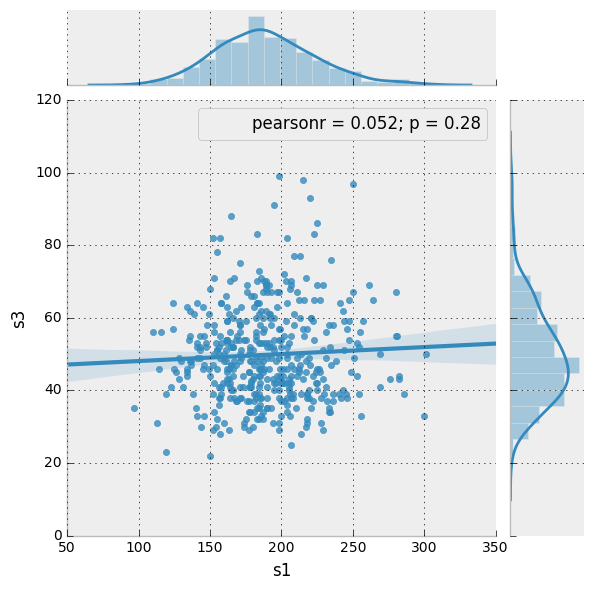

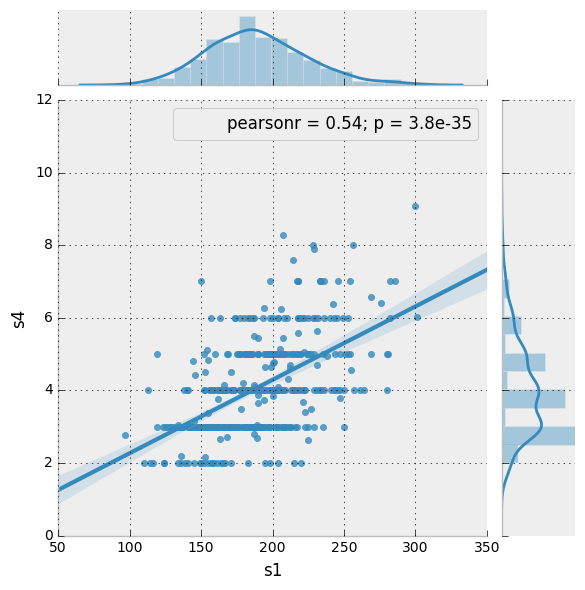

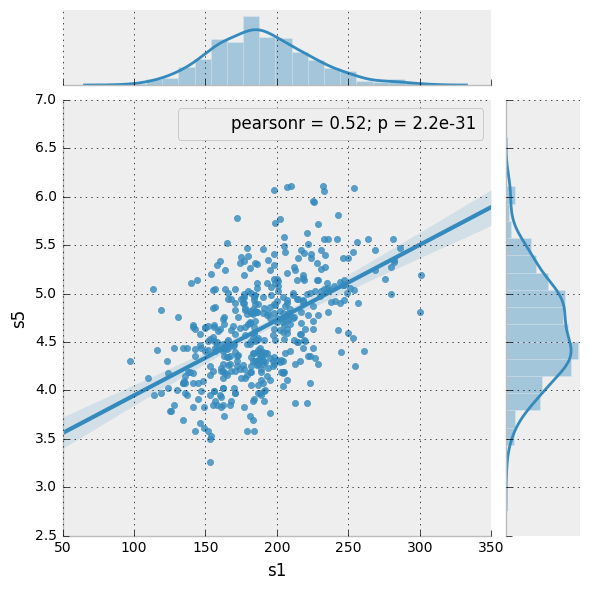

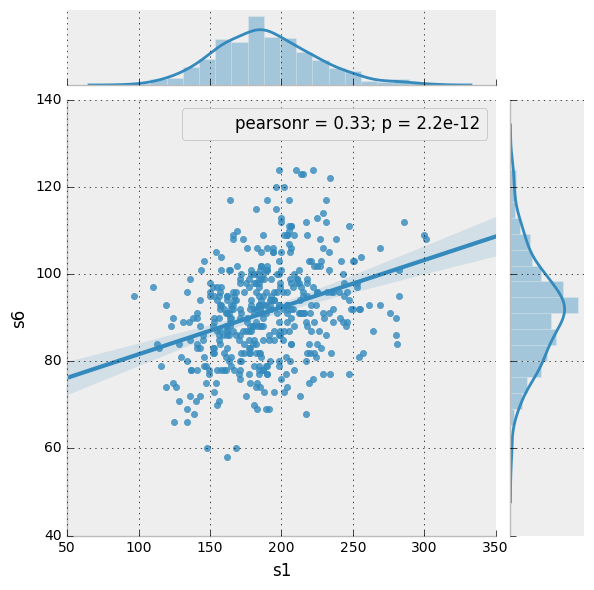

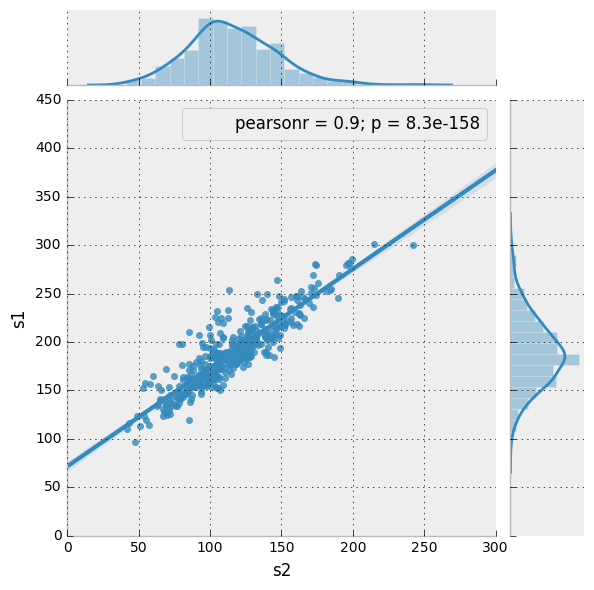

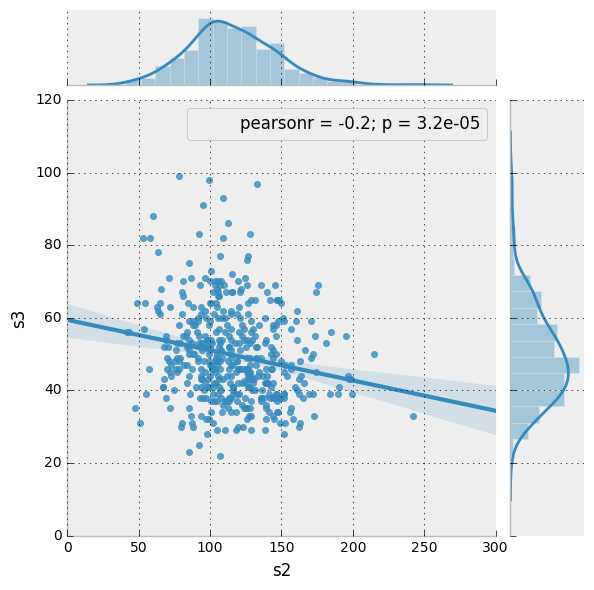

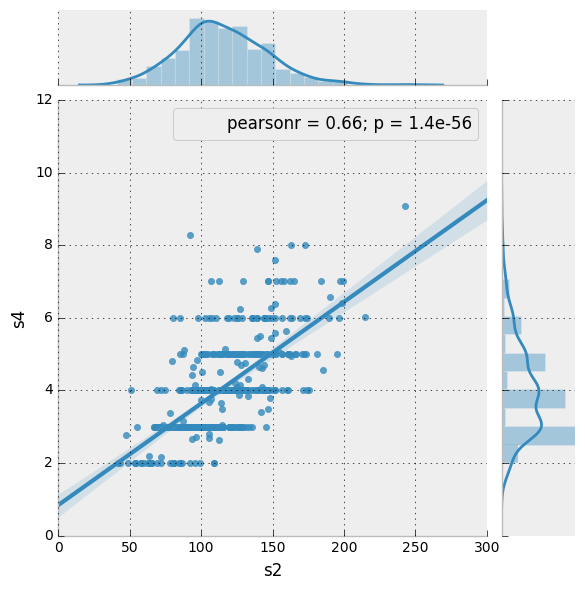

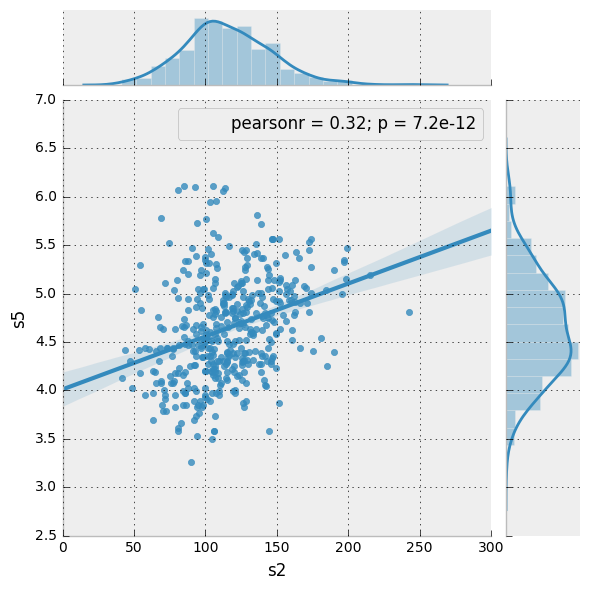

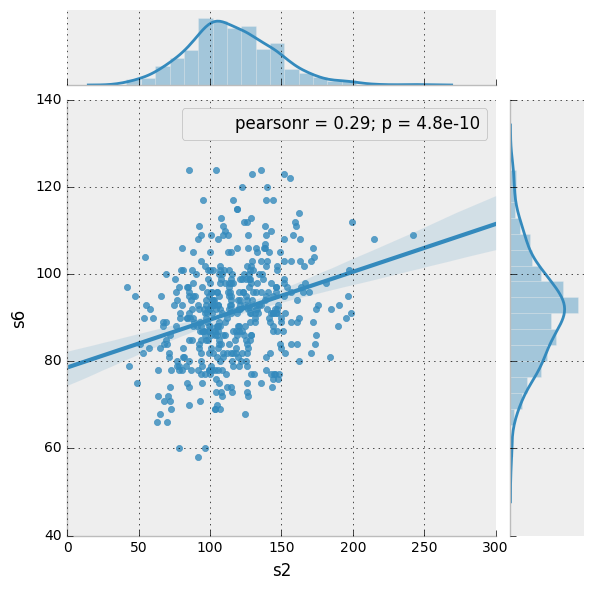

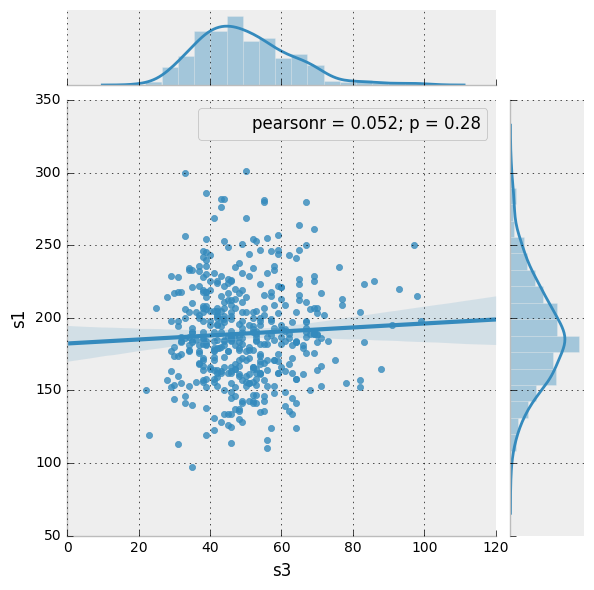

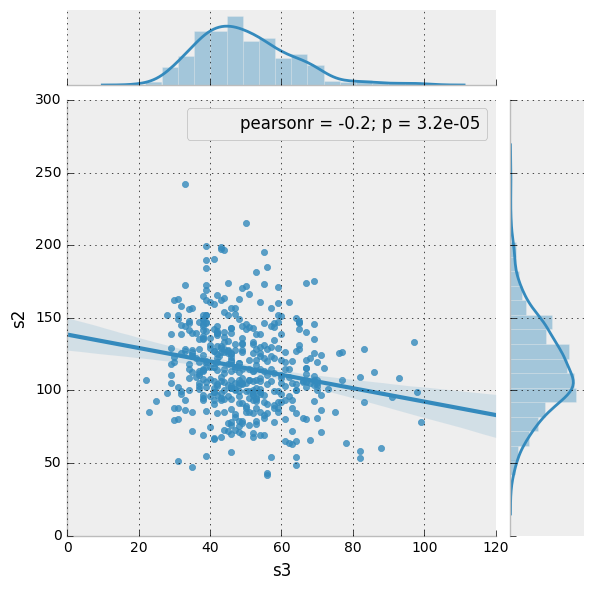

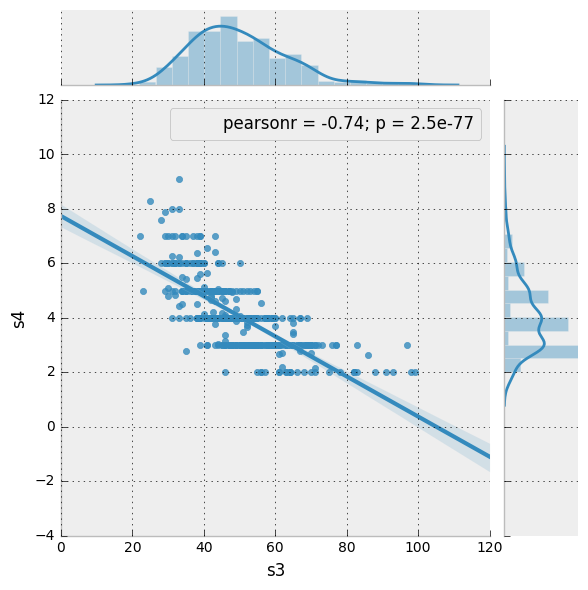

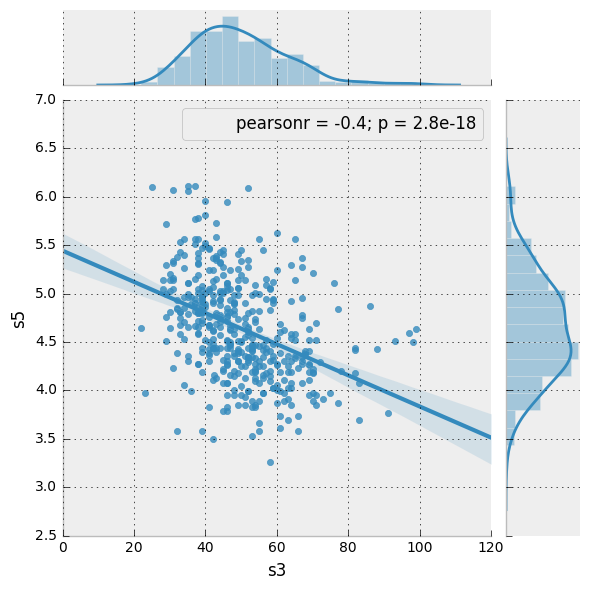

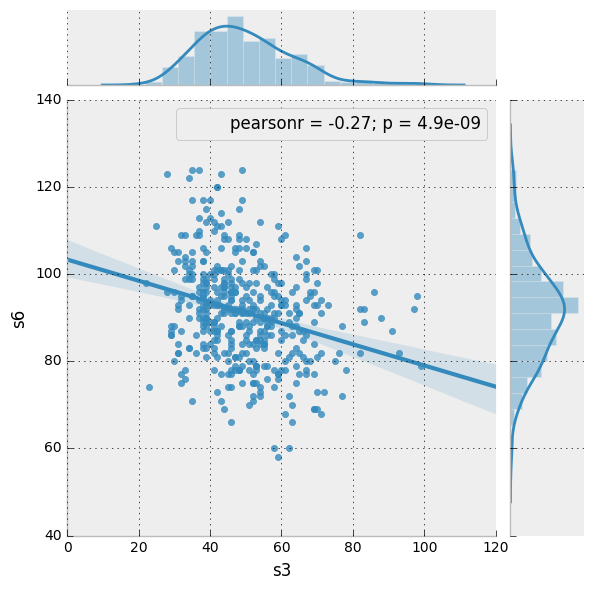

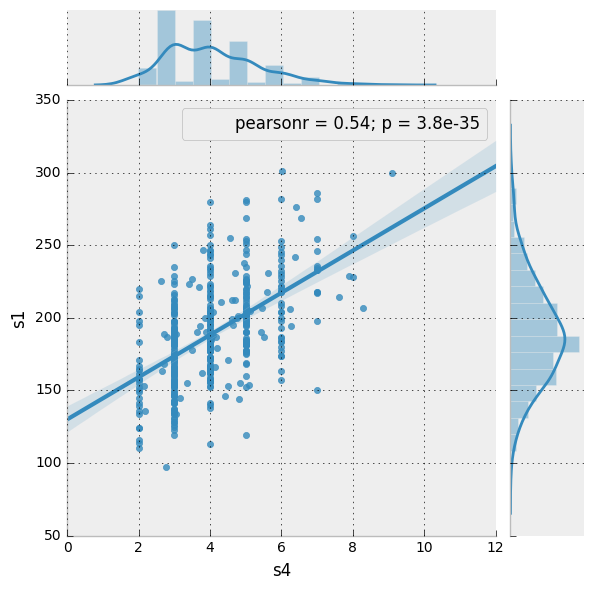

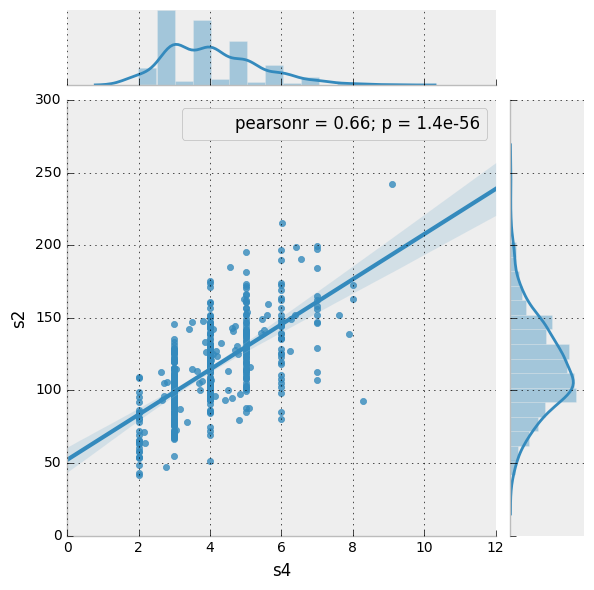

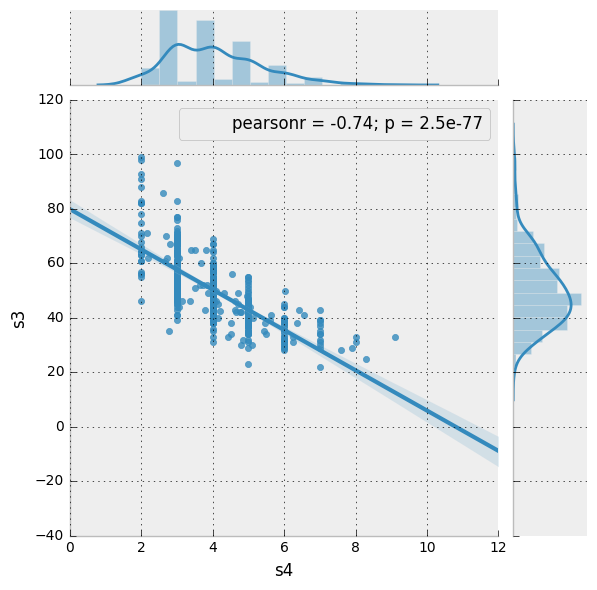

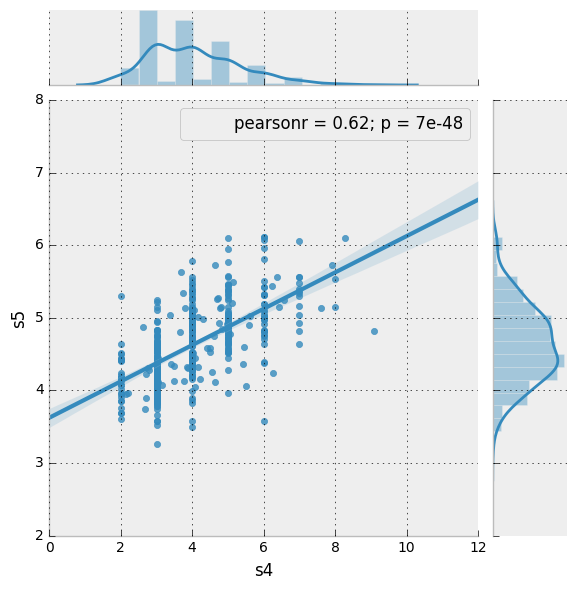

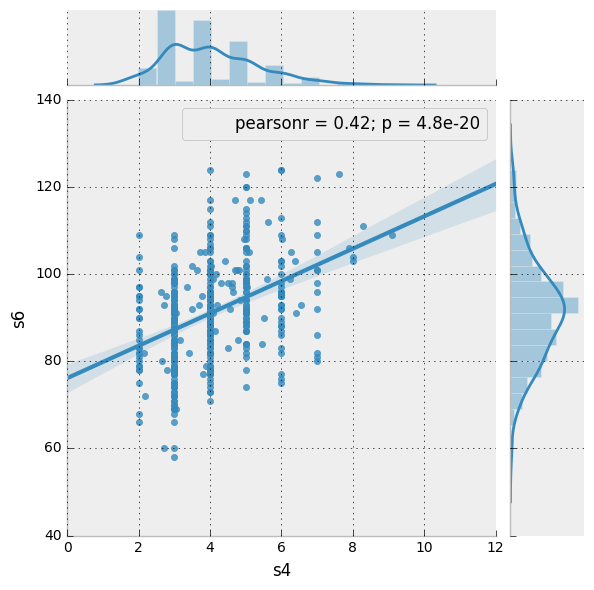

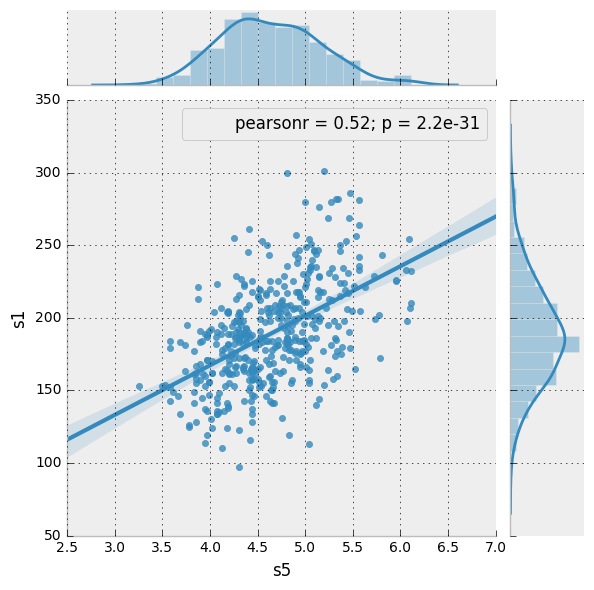

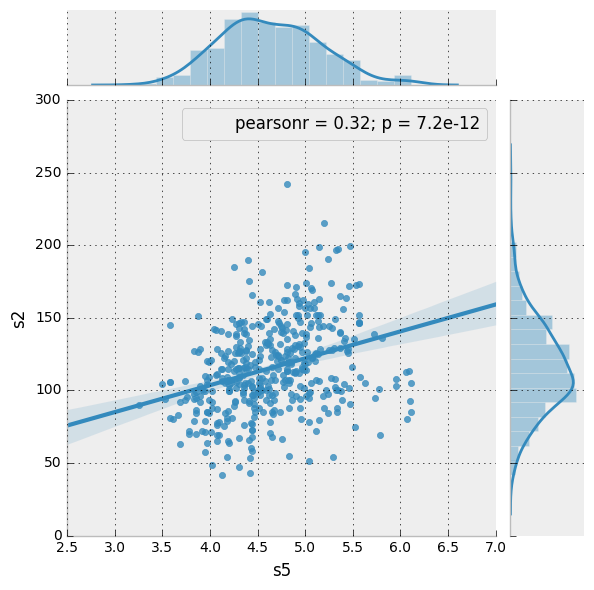

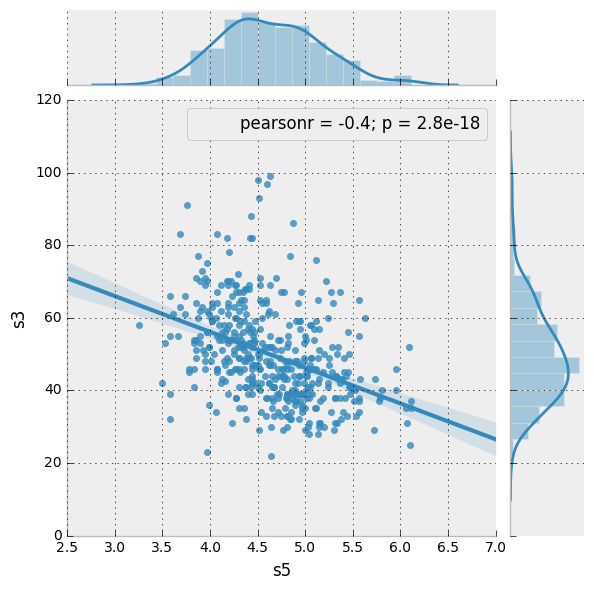

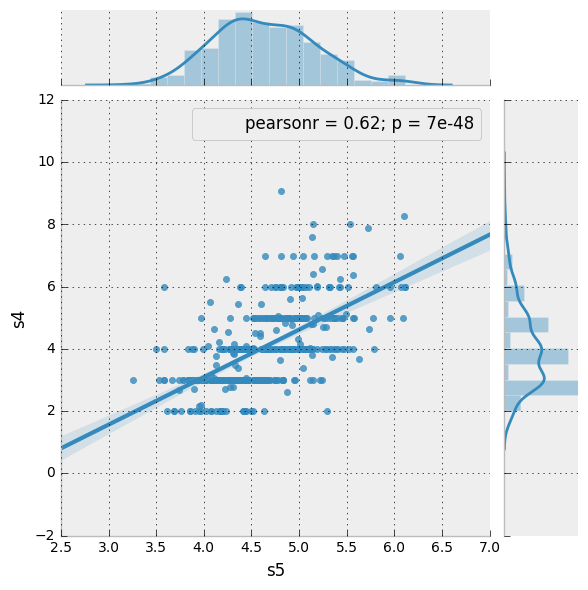

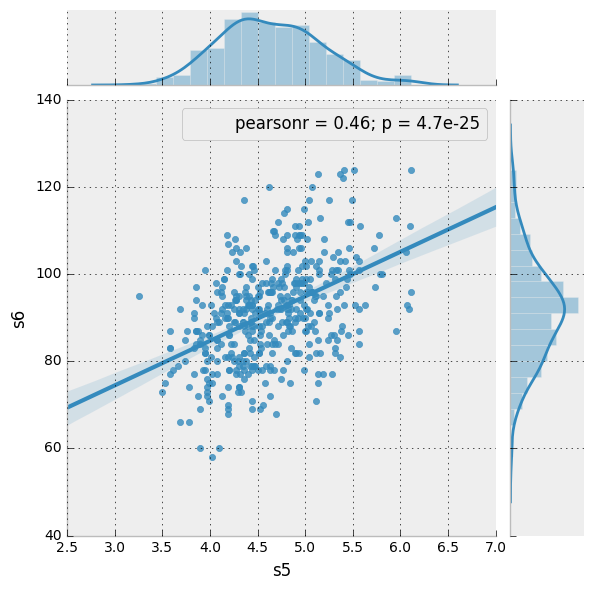

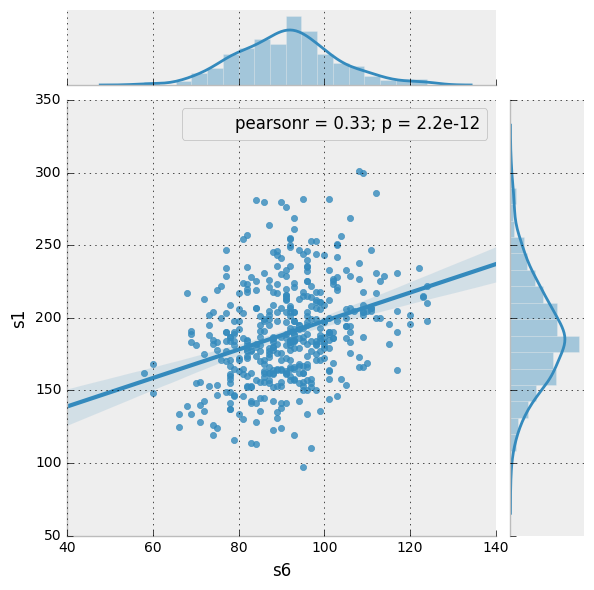

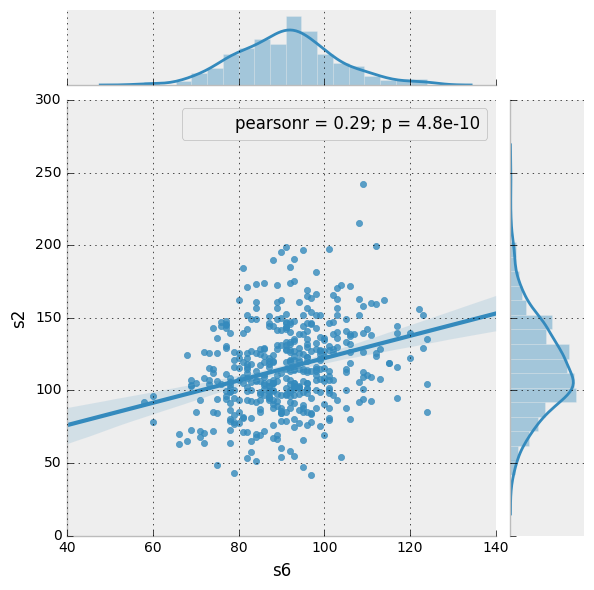

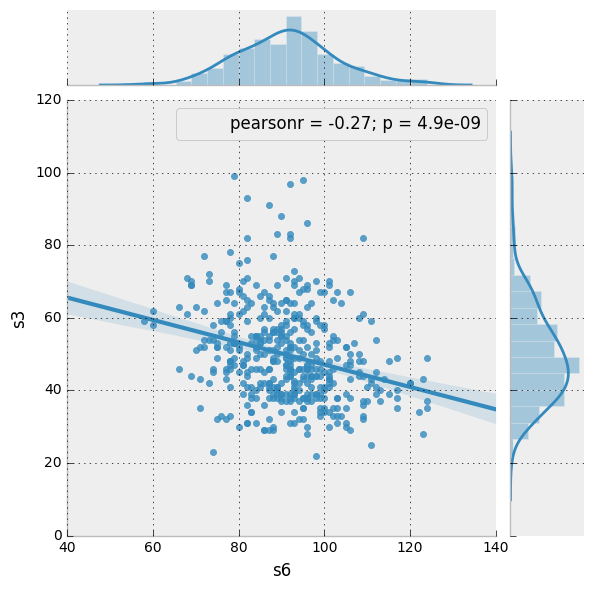

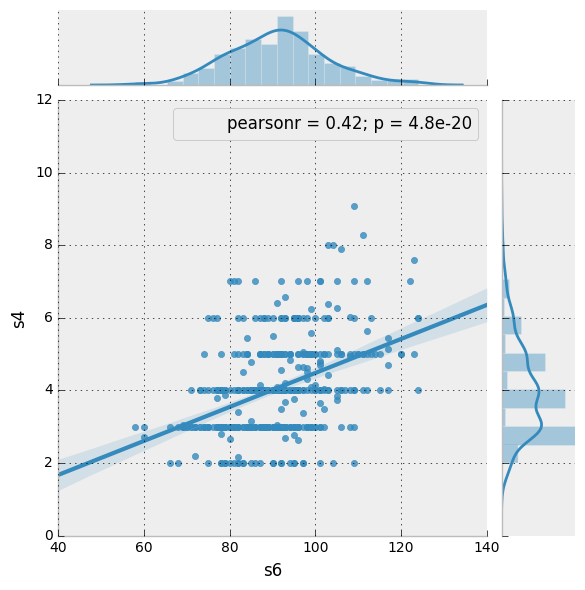

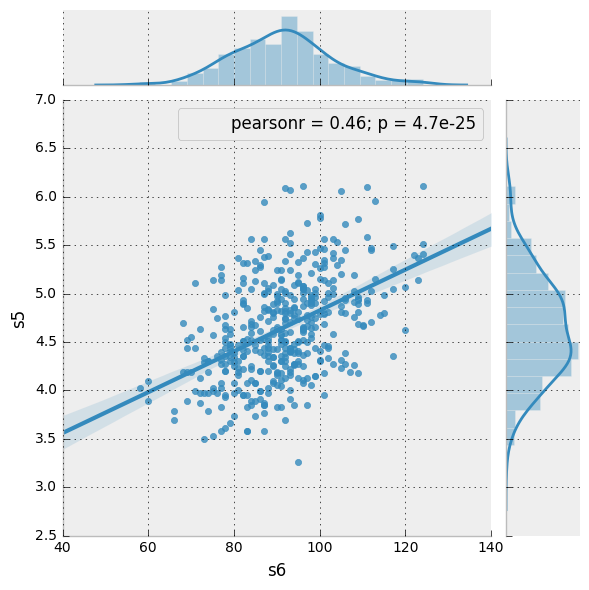

In [7]:
for i in ['s1','s2','s3','s4','s5','s6']:
    for j in ['s1','s2','s3','s4','s5','s6']:
        if i !=j:
            sns.jointplot(i, j, data=df, kind="reg")
            plt.show()

### Soal 1.3.b (3 poin)

Gambarkan juga *correlation heatmap* dari keenam nilai serum tersebut. Apakah ada pola menarik yang Anda temukan?

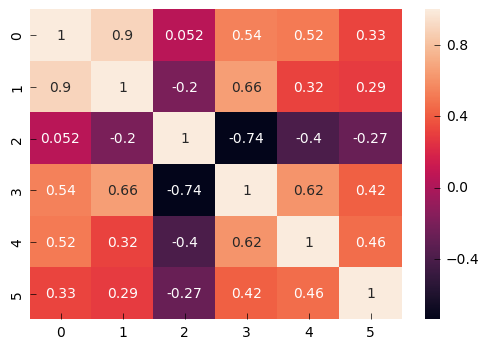

In [10]:
sns.heatmap(np.corrcoef([df.s1,df.s2,df.s3,df.s4,df.s5,df.s6]), annot=True)
plt.show()

*Jawaban Anda di sini*

### Soal 1.4 (3 poin)

Gambarkan *correlation heatmap* untuk semua atribut dan label dari data yang diberikan. Apa yang dapat Anda amati?

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y'], dtype='object')

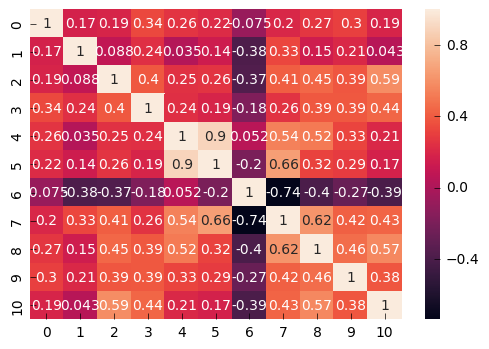

In [14]:
sns.heatmap(np.corrcoef([df.age, df.sex, df.bmi, df.bp, df.s1,df.s2,df.s3,df.s4,df.s5,df.s6, df.y]), annot=True)
plt.show()


*Jawaban Anda di sini*

### Soal 1.4.b (2 poin)

Anda mungkin melihat bahwa salah satu atribut yang berkorelasi cukup kuat dengan label yang digunakan adalah `bmi`. Coba gambarkan *scatter plot* dengan menggunakan `bmi` sebagai sumbu horizontal dan `y` sebagai sumbu vertikal.

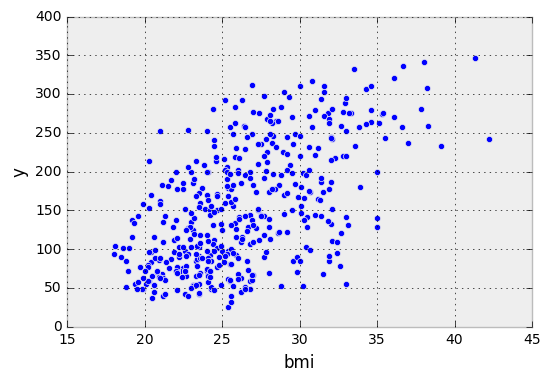

In [81]:
plt.scatter(df.bmi, df.y)
plt.xlabel('bmi')
plt.ylabel('y')
plt.show()

### Soal 1.5 (2 poin)

Gambarkan histogram dari label yang Anda gunakan agar dapat lebih memahami kasus yang Anda akan tangani. Laporkan juga *summary statistics*-nya.

C:\Users\nurul\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


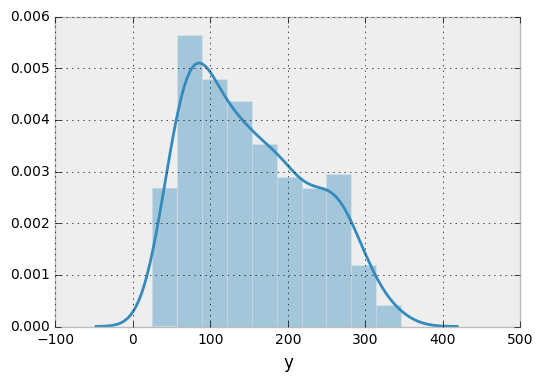

In [18]:
sns.distplot(df.y)
plt.show()

In [20]:
df.y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: y, dtype: float64

### Soal 1.6 (2 poin)

Bagi dataset Anda menjadi 70% data latih dan 30% data uji dengan menggunakan `train_test_split()`.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:10]], df.y, test_size=0.3,random_state=RANDOM_STATE)

## 2. Regresi Linear (40 poin)

Anda diminta untuk melakukan regresi pada dataset yang telah diberikan. Tentu akan sangat baik jika Anda bisa memahami label yang akan diprediksi. Namun, dalam tugas ini, Anda tidak perlu berfokus pada interpretasi dari label dan prediksinya. Anda hanya diminta untuk menjelaskan hasil eksplorasi Anda dengan *benchmark* yang ditetapkan di awal.

### Soal 2.1.a (3 poin)

Lakukan 5-fold cross validation pada data latih dengan menggunakan algoritma `LinearRegression` dengan fitur `bmi` saja. Laporkan nilai rata-rata *root-mean-square error* (RMSE) dari 5-fold CV tersebut.

In [67]:
import math

model = LinearRegression()
model.fit(x_train[['bmi']], y_train)
y_pred = cross_val_predict(model, x_train[['bmi']], y_train, cv=5)
rmse = math.sqrt(mean_squared_error(y_train,y_pred))
rmse

63.549038512809155

### Soal 2.1.b (2 poin)

Lakukan hal yang sama seperti pada soal 2.1.a, tapi kali ini dengan semua fitur yang ada. Laporkan kembali RMSE-nya.

In [68]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = cross_val_predict(model, x_train, y_train, cv=5)
rmse = math.sqrt(mean_squared_error(y_train,y_pred))
rmse

56.756716095631916

### Soal 2.2.a (6 poin)

Apakah kita bisa menghasilkan model yang lebih baik? Sekarang coba lakukan regresi dengan fungsi basis polinomial. Gunakan nilai polinomial $p \in [1,5]$. Gambarkan RMSE dari 5-fold CV dengan berbagai nilai transformasi polinomial tersebut dalam bentuk *line plot*.

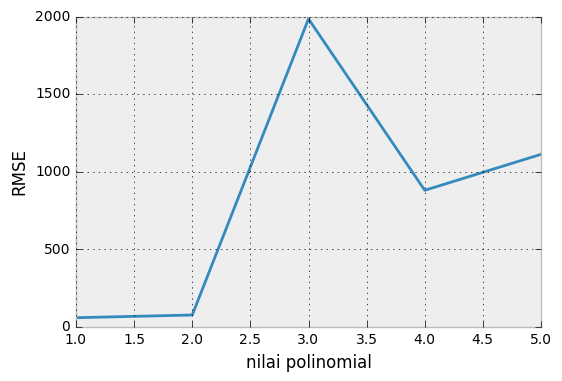

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

rmse = []
for p in range(1,6):
    poly_model = make_pipeline(PolynomialFeatures(p),
                               LinearRegression())

    poly_model.fit(x_train, y_train)pl.t
    y_pred = cross_val_predict(poly_model, x_train, y_train, cv=5)
    rmse.append(math.sqrt(mean_squared_error(y_train,y_pred)))

plt.plot(range(1,6), np.array(rmse))
plt.ylabel('RMSE')
plt.xlabel('nilai polinomial')

### Soal 2.2.b (1 poin)

Berdasarkan grafik yang telah Anda buat pada soal 2.2.a, berapa nilai $p$ yang terbaik?

*Jawaban Anda di sini*
Paling baik saat RMSE nya bernilai kecil, yaitu antara p adalah 1 atau 2. (dalam kasus ini, saya akan mengambil polinomial orde 2 yang terbaiknya)

### Soal 2.2.c (3 poin)

Dari model yang terbaik tersebut, gambarkan nilai koefisien untuk masing-masing atribut dalam bentuk *bar plot*.

In [78]:
poly_model = make_pipeline(PolynomialFeatures(2),
                               LinearRegression())

poly_model.fit(x_train, y_train)
y_pred = cross_val_predict(poly_model, x_train, y_train, cv=5)
rmse = math.sqrt(mean_squared_error(y_train,y_pred))

### Soal 2.3.a (2 poin)

Lakukan hal yang sama seperti pada soal 2.2.a, tapi ganti algoritma regresi yang digunakan dengan `Ridge`.

### Soal 2.3.b (3 poin)

Berdasarkan hasil yang Anda dapatkan, perbedaan apa yang dapat Anda amati? Menurut Anda, mengapa hasilnya bisa seperti itu?

*Jawaban Anda di sini*

### Soal 2.4.a (2 poin)

Apa fungsi regularisasi seperti pada *ridge* dan *lasso regression*?

*Jawaban Anda di sini*

### Soal 2.4.b (2 poin)

*Loss function* dengan regularisasi $L_2$ didefinisikan sebagai
$$
O(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 - \alpha \|\mathbf{w}\|_2^2
$$
Apa yang terjadi saat $\alpha \rightarrow 0$ dan $\alpha \rightarrow \infty$?

*Jawaban Anda di sini*

### Soal 2.5.a (4 poin)

Dari model terbaik yang Anda dapatkan tersebut, lakukan prediksi pada data uji, lalu laporkan RMSE-nya.

### Soal 2.5.b (4 poin)

Gambarkan *residual plot* dari prediksi yang dilakukan pada data uji dengan sumbu horizontal adalah $\hat{y}$ dan sumbu vertikal adalah residualnya. Jangan lupa untuk memberikan label pada tiap sumbu. Apa yang dapat Anda amati?

*Jawaban Anda di sini*

### Soal 2.6 (2 poin)

Pada dasarnya, kita dapat menggunakan optimasi analitis untuk mendapatkan solusi tertutup dari regresi linear. Sebagai alternatif, apakah kita dapat menggunakan optimasi numerik seperti *gradient descent*? Jika ya, apakah hasil optimasinya akan sama? Berikan alasannya. Jika tidak, apa yang menyebabkan hasilnya tidak akan sama?

*Jawaban Anda di sini*

### Soal 2.7 (2 poin)

Dalam eksplorasi ini, Anda diminta menggunakan RMSE sebagai *evaluation metrics*. Kapan Anda dapat menggunakan *metrics* alternatif seperti *mean absolute error* (MAE)? Apa keuntungannya?

*Jawaban Anda di sini*

### Soal 2.8 (4 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah dilakukan.

*Jawaban Anda di sini*